# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# HMA: Automate data download for AWS spot usage 
# Check / Download / Unzip - Traffic Sign Dataset

import os
trafficSignData_DIR = './00-trafficSignData'
trafficSignData_ZIP = './00-trafficSignData.zip'

if not(os.path.isdir(trafficSignData_DIR)):
    if not(os.path.exists(trafficSignData_ZIP)):
        # Download Dataset zipfile if DIR and ZIP file do not exist
        import urllib.request
        url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'
        print("Downloading Traffic Sign Dataset...")
        urllib.request.urlretrieve(url, trafficSignData_ZIP)
    
    # Unzip Dataset zipfile
    if (os.path.exists(trafficSignData_ZIP)):
        print("Unzipping Traffic Sign Dataset...")
        os.makedirs(trafficSignData_DIR)
        import zipfile
        zip_ref = zipfile.ZipFile(trafficSignData_ZIP, 'r')
        zip_ref.extractall(trafficSignData_DIR)
        zip_ref.close()
print("Traffic Sign Dataset ready.")

Traffic Sign Dataset ready.


In [2]:
# Load pickled data
import pickle

# HMA: Fill this in based on where you saved the training and testing data
training_file = os.path.join(trafficSignData_DIR, 'train.p') 
validation_file = os.path.join(trafficSignData_DIR, 'valid.p')
testing_file = os.path.join(trafficSignData_DIR, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# HMA: Number of training examples
n_train = len(X_train)

# HMA: Number of validation examples
n_validation = len(X_valid)

# HMA: Number of testing examples.
n_test = len(X_test)

# HMA: What's the shape of an traffic sign image?
# HMA: Trainig array composition - (num examples, width, height, channels)
_, image_width, image_height, _ = X_train.shape
image_shape = (image_width, image_height)

# HMA: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Rubric: Dataset Exploration
 - **Criteria**: Dataset Summary
 - **Acceptance criteria**: The submission includes a basic summary of the data set.
 - **Output**: **PASS** - The cell above prints a general summary from the training and test sets, and also the number of classes.

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

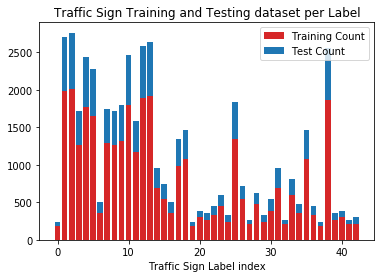

In [5]:
# HMA: Histogram from Matplot sample - a stacked bar plot
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

tsDict_train = Counter(y_train)
tsDict_test = Counter(y_test)

tsCount_train = tsDict_train.values()
tsCount_test = tsDict_test.values()
width = 0.8

p1 = plt.bar(list(tsDict_train.keys()), tsCount_train, width, color='#d62728')
p2 = plt.bar(list(tsDict_test.keys()), tsCount_test, width, bottom=tsCount_train)          

plt.xlabel('Traffic Sign Label index')
plt.title('Traffic Sign Training and Testing dataset per Label')
plt.legend((p1[0], p2[0]), ('Training Count', 'Test Count'))

plt.show()

### Rubric:  Dataset Exploration
 - **Criteria**: Exploratory Visualization
 - **Acceptance criteria**: The submission includes an exploratory visualization on the dataset.
 - **Output**: **PASS** - The histogram plot above presents the count of each class for the training ans test sets for the analysis which follows.

> **HMA** - The histogram above shows the count of training inputs per label (from the training set) and the associated count of tests per label (from the test set). There are clearly some classes (lables) with many more Training samples, 4 times or more. The same observation is valid to the number of tests for the same classes. Outcomes from this scenario:
> - This will probably lead to poor prediction for classes with less then 1000 training samples.
> - A low number of tests for label with potencially poor prediction, will influence the accuracy measurement, since a small number of wrong predictions will impact less this measurement.

> This could be solved with more data (which is not always availabel), or data augmentation (for instance, image rotation as a new training sample for the same class). Let's anyway see how the dataset as it is will behave. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### HMA: Pre-process - Normalize
Normalize the training data

In [7]:
# HMA: Save Data for later reference

X_train_save = list(X_train)
X_valid_save = list(X_valid)
X_test_save = list(X_test)

In [8]:
# HMA: From forum - https://discussions.udacity.com/t/color-bgr-to-gray-with-cv2/

import cv2

def convert2gray(imgDataset):
    imgDatasetGray = []
    for img in imgDataset:
        bgr_image = img
        gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY) #shape (32,32)
        gray_image = gray_image.reshape((32,32,1)) #shape (32,32,1)
        imgDatasetGray.append(gray_image)
    return imgDatasetGray

In [9]:
# HMA: Normalization
# https://discussions.udacity.com/t/lenet-producing-only-a-75-accuracy

def normalize(imgDataset):
    #return[((X - 128)/128) for X in imgDataset]
    return[(X/127.5 - 1.0) for X in imgDataset]

In [10]:
X_train = convert2gray(X_train)
X_valid = convert2gray(X_valid)
X_test = convert2gray(X_test)

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

### Rubric: Design and Test a Model Architecture
 - **Criteria**: Preprocessing 
 - **Acceptance criteria**: The submission describes the preprocessing techniques used and why these techniques were chosen.
 - **Output**: **PASS** 

> **HMA**: Grey conversion was a second applied technique to increase the model's accuracy. Normalization was the first preprocessing technique since it's required for a faster improvement during training. 

### HMA: Define Model
Using the LeNet model

In [12]:
### Model Architecture
### Define your architecture here.
### Feel free to use as many code cells as needed.

### HMA: Define Model - Architecture

- **Input**: The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. The Traffic Sign Dataset has three color channels, but only one after conversion to grayscale , the input is 32x32x1.

- **Architecture**
  - **Layer 1**
    - **Convolutional.** The output shape should be 28x28x6.
    - **Activation.** ReLU.
    - **Pooling.** The output shape should be 14x14x6.
  - **Layer 2**
    - **Convolutional.** The output shape should be 10x10x16.
    - **Activation.** ReLU.
    - **Pooling.** The output shape should be 5x5x16.
    - **Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.
  - **Layer 3**
    - **Fully Connected.** This should have 120 outputs.
    - **Activation.** ReLU.
  - **Layer 4**
    - **Fully Connected.** This should have 84 outputs.
    - **Activation.** ReLU.
  - **Layer 5**
    - **Fully Connected (Logits).** This should have 43 outputs.

- **Output**: Return the result of the 2nd fully connected layer.

### Rubric: Design and Test a Model Architecture
 - **Criteria**: Model Architecture 
 - **Acceptance criteria**: The submission provides details of the characteristics and qualities of the architecture, including the type of model used, the number of layers, and the size of each layer. Visualizations emphasizing particular qualities of the architecture are encouraged.
 - **Output**: **PASS**
> **HMA**: Here it was used the LeNet architecture, with the changes presented on the previous lesson (pooling instead of the orignal sampling technique). More details on the layers sizes and activations are presented above.

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### HMA: Define Model - Features and Labels
- x: placeholder for a batch of input images 
- y: placeholder for a batch of output labels

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
rate = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### HMA: Define Model - Training Pipeline

In [17]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### HMA: Define Model - Model Evaluation

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, hp_batchSize):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, hp_batchSize):
        batch_x, batch_y = X_data[offset:offset+hp_batchSize], y_data[offset:offset+hp_batchSize]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### HMA: Model - Train

In [19]:
def printSummary(validation, test):
    fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

    ax0.plot(list(validation.keys()), list(validation.values()))
    ax0.set_title('Validation accuracy')
    
    ax1.plot(list(test.keys()), list(test.values()))
    ax1.set_title('Test accuracy')
    plt.ylim([0.7, 1])
    plt.show()    

In [25]:
from sklearn.utils import shuffle
import time
init_rate = 0.001

def trainingSession(hp_epochs, hp_batchSize):
    start_time = time.time()
    with tf.Session() as sess:
        global X_train, y_train
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        validation_summary = {}
        test_summary = {}
        current_rate = init_rate

        for epoch in range(hp_epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, hp_batchSize):
                end = offset + hp_batchSize
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                if epoch == 75:
                    current_rate = 0.0001
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate: current_rate})

            validation_accuracy = evaluate(X_valid, y_valid, hp_batchSize)
            validation_summary[epoch] = validation_accuracy
            
            test_accuracy = evaluate(X_test, y_test, hp_batchSize)
            test_summary[epoch] = test_accuracy
            #print("EPOCH {} ...".format(epoch+1))
            #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            #print("Test Accuracy = {:.3f}".format(test_accuracy))
            #print()
        print("Training time: %s seconds " % (time.time() - start_time))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        printSummary(validation_summary, test_summary)
        saver.save(sess, './lenet')
        #print("Model saved")

Training time: 142.83695197105408 seconds 
Validation Accuracy = 0.913
Test Accuracy = 0.901


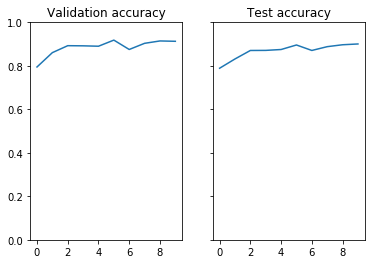

In [23]:
trainingSession(hp_epochs = 10, hp_batchSize = 64)

Training time: 285.1618342399597 seconds 
Validation Accuracy = 0.927
Test Accuracy = 0.913


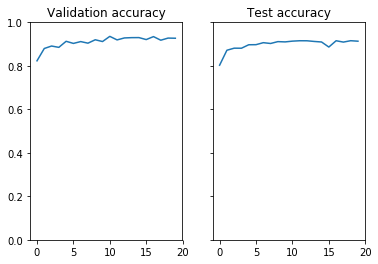

In [24]:
trainingSession(hp_epochs = 20, hp_batchSize = 64)

Training time: 422.9688642024994 seconds 
Validation Accuracy = 0.927
Test Accuracy = 0.917


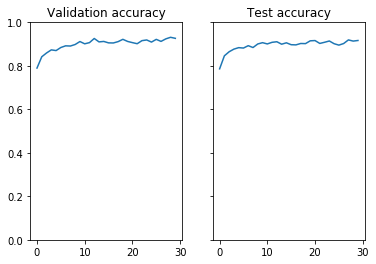

In [25]:
trainingSession(hp_epochs = 30, hp_batchSize = 64)

Training time: 122.73830437660217 seconds 
Validation Accuracy = 0.891
Test Accuracy = 0.886


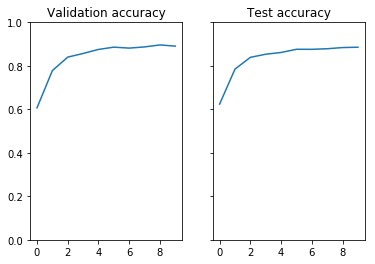

In [26]:
trainingSession(hp_epochs = 10, hp_batchSize = 256)

Training time: 395.29146432876587 seconds 
Validation Accuracy = 0.916
Test Accuracy = 0.916


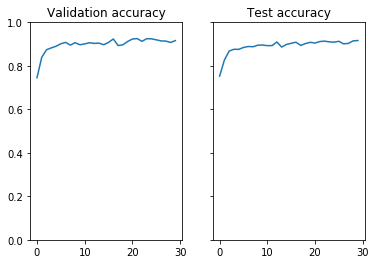

In [27]:
trainingSession(hp_epochs = 30, hp_batchSize = 128)

Training time: 792.1646664142609 seconds 
Validation Accuracy = 0.929
Test Accuracy = 0.918


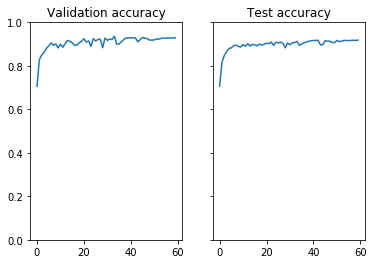

In [28]:
trainingSession(hp_epochs = 60, hp_batchSize = 128)

Training time: 792.4273040294647 seconds 
Validation Accuracy = 0.915
Test Accuracy = 0.906


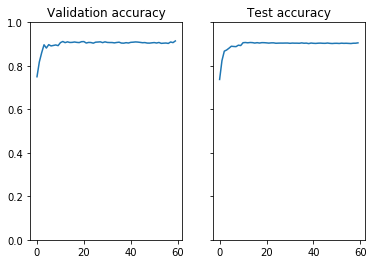

In [36]:
# Epochs [01 - 10]: learning rate = 0.001
# Epochs [11 - 60]: learning rate = 0.0001
trainingSession(hp_epochs = 60, hp_batchSize = 128)

Training time: 1340.658573627472 seconds 
Validation Accuracy = 0.944
Test Accuracy = 0.926


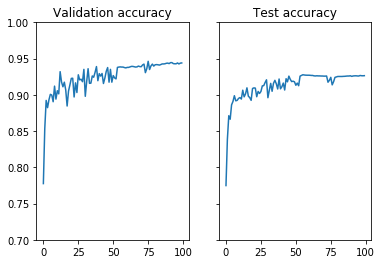

In [40]:
trainingSession(hp_epochs = 100, hp_batchSize = 128)

Training time: 3240.321761608124 seconds 
Validation Accuracy = 0.933
Test Accuracy = 0.927


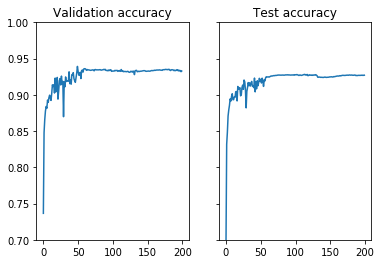

In [26]:
# Epochs [001 - 075]: learning rate = 0.001
# Epochs [076 - 200]: learning rate = 0.0001
trainingSession(hp_epochs = 200, hp_batchSize = 128)

### Rubric: Design and Test a Model Architecture
 - **Criteria**: Model Training 
 - **Acceptance criteria**: The submission describes how the model was trained by discussing what optimizer was used, batch size, number of epochs and values for hyperparameters.
 - **Output**: **PASS**


 - **Criteria**: Solution Approach 
 - **Acceptance criteria**: The submission describes the approach to finding a solution. Accuracy on the validation set is 0.93 or greater.
 - **Output**: **PASS**

> **HMA**: The model used the Adam optimizer which already proved a good choice when achieving a reasonable accuracy for a low number of epochs (10). The selection and tune of hyperparameter was done then empiracally, as shown in the sequence of tests and outputs plots above. The last test values for epochs were 200 and batch of 128 with learning rate of 0.001 and 0.0001 after 75 iterations. 

> The final values of accuracy for the test and validation sets were of ~0.94 and ~0.93.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### HMA: Extra test set
Five new traffic sign images were extracted from the site http://bicyclegermany.com/german_bicycle_laws.html

The sequence below prepares the inputs (X_testExtra) and labels (y_testExtra)

In [50]:
import cv2
import os, os.path
import matplotlib.pyplot as plt

%matplotlib inline

X_testExtra = []
y_testExtra = []

path = "./10-proj-extraImages"
for file in os.listdir(path):
    print(file)
    img = cv2.imread(os.path.join(path,file))
    img = cv2.resize(img,(32,32))
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    X_testExtra.append(img)
    y_testExtra.append(int(os.path.splitext(file)[0]))

14.png
17.png
18.png
11.png
12.png


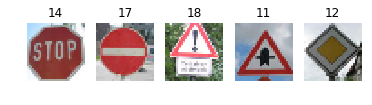

In [51]:
# Plot the extracted and scaled images
f, axarr = plt.subplots(1, len(X_testExtra))

for index in range(len(X_testExtra)):    
    axarr[index].axis('off')
    axarr[index].set_title(y_testExtra[index])
    axarr[index].imshow(X_testExtra[index])
plt.show()

### Rubric: Test a Model on New Images
 - **Criteria**: Acquiring New Images
 - **Acceptance criteria**: The submission includes five new German Traffic signs found on the web, and the images are visualized. Discussion is made as to particular qualities of the images or traffic signs in the images that are of interest, such as whether they would be difficult for the model to classify.
 - **Output**: **PASS**

> **HMA**: The images are presented above with the respective class. Images 17, 11 and 12 are well presented and are likelly to have a good prediction score. Image 18 has a mixture with more than one sign and image 14 is closer than other stop signs on the training set. These last 2 images might present lower prediction scores.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [52]:
X_testExtra = convert2gray(X_testExtra)
X_testExtra = normalize(X_testExtra)

In [56]:
# HMA: Prediction for single element
# tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for index in range(len(X_testExtra)):        
        prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: [X_testExtra[index]]})
        print("Label: ", y_testExtra[index])
        print("Prediction: ",prediction)
        print()

Label:  14
Prediction:  [26]

Label:  17
Prediction:  [17]

Label:  18
Prediction:  [9]

Label:  11
Prediction:  [11]

Label:  12
Prediction:  [12]



### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [55]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_testExtra, y_testExtra, 5)
    print("Test Accuracy Extra Images = {:.3f}".format(test_accuracy))

Test Accuracy Extra Images = 0.600


### Rubric: Test a Model on New Images
 - **Criteria**: Performance on New Images
 - **Acceptance criteria**: The submission documents the performance of the model when tested on the captured images. The performance on the new images is compared to the accuracy results of the test set.
 - **Output**: **PASS**
 
> **HMA**: As shown in the predictions above, the accuracy for the new images is only 60%, which is really poor compared to the accuracy measurement of 93%. There are a number of resons for this low accuracy, from the chosen new images to the number of training samples. These are presented in details in the Softmax output analysis below.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [57]:
# HMA: Top 3 Softmax
# tf.nn.top_k(tf.nn.softmax(logits), k=3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for index in range(len(X_testExtra)):        
        smax = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=3), feed_dict={x: [X_testExtra[index]]})
        print("Label: ", y_testExtra[index])
        print("SoftMax: ",smax)
        print()

Label:  14
SoftMax:  TopKV2(values=array([[ 0.84213787,  0.15261145,  0.00446874]], dtype=float32), indices=array([[26, 14, 38]], dtype=int32))

Label:  17
SoftMax:  TopKV2(values=array([[  1.00000000e+00,   7.28675201e-44,   0.00000000e+00]], dtype=float32), indices=array([[17, 40,  0]], dtype=int32))

Label:  18
SoftMax:  TopKV2(values=array([[  1.00000000e+00,   1.03344949e-29,   1.24452834e-32]], dtype=float32), indices=array([[ 9, 17, 41]], dtype=int32))

Label:  11
SoftMax:  TopKV2(values=array([[ 1.,  0.,  0.]], dtype=float32), indices=array([[11,  0,  1]], dtype=int32))

Label:  12
SoftMax:  TopKV2(values=array([[  1.00000000e+00,   8.89914568e-22,   9.58291207e-33]], dtype=float32), indices=array([[12, 40, 32]], dtype=int32))



### Rubric: Test a Model on New Images
 - **Criteria**: Model Certainty - Softmax Probabilities
 - **Acceptance criteria**: The top five softmax probabilities of the predictions on the captured images are outputted. The submission discusses how certain or uncertain the model is of its predictions.
 - **Output**: **PASS**

> **HMA**: It is really interesting to see the Softmax results, in special for the wrong predictions!
- For the correct predictions, the probability for the top softmax class is almost 100% and quite close to 0% for the other possible classes. It means that the model is quite certain of these predictions.
- For the missed predictions, case by case:
    - Label 14, Stop sign:
        - Test image: the test image is not optimal, during crop, the sign borders were partially cutted. The image is too close to the sign so its shape is not quite noticeable. Probably one of the reasons for the missclassification. 
        - Training: as observed at the data exploratory phase, the class 14 is one of the classe with "few" examples, around 700 training images. With a small number of training images for this class, the net prediction does not generalize suffently for a closer image, such as this test image. Hence the importance of training samples or data augmentation.
        - Softmax: Furthermore, from the softmax output, the first probability is of 84% for the wrong class and 15% probaility for the correct class. The model identified correctly nevertheless some of the sign features.
    - Label 18, General caution sign:
        - Test image: To start, the test image contains 2 signs. The target sign is not centered and is cropped on the top. Very likely it does not reasemble the images from the training image set.
        - Training: This class has a reasonable number of training examples, around 1000, but still not enough to identify this sign associated with other signs.
        - Softmax: Quite surprisingly the model outputs a high probability for the wrong class. It does not present even a slight probability for the correct class. Possible "solution", more train data for this sign. (Well, isn't that always the solution?)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")